In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
import os

In [5]:
from google.colab import drive
drive.mount('/JanvierDrive')

Mounted at /JanvierDrive


In [2]:
train_dir = 'train'
validation_dir = 'validataion'
test_dir ='test'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 692 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
images=[]
def read_images():
    print("loading known faces")
    for name in os.listdir(train_dir):
        for filename in os.listdir(train_dir+"/"+name): #join
            image = train_dir+"/"+name+"/"+filename
            images.append((image,name))
    return images

In [8]:
read_images()[0]

loading known faces


('/JanvierDrive/MyDrive/AI-FELLOWSHIP/train/FAW/10_01_01.png', 'FAW')

loading known faces


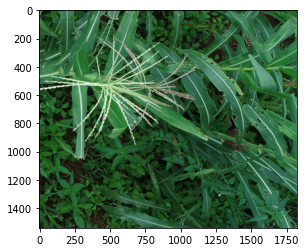

In [9]:
im=plt.imread(read_images()[17][0])
plt.imshow(im)

In [10]:
read_images()[503]

loading known faces


('/JanvierDrive/MyDrive/AI-FELLOWSHIP/train/health/DJI_0741_01_03.png',
 'health')

loading known faces


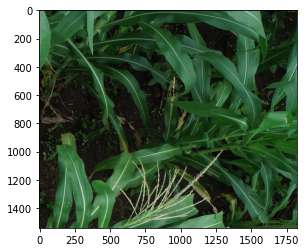

In [11]:
im=plt.imread(read_images()[503][0])
plt.imshow(im)

In [12]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 256, 256, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [15]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history=model.fit_generator(train_generator, steps_per_epoch=692//50, epochs=20, validation_data=validation_generator, validation_steps=100//50)
#model.save_weights('first_try.h5')

Epoch 1/20


InvalidArgumentError: ignored

In [16]:
from tensorflow.keras.models import load_model

In [20]:
model=load_model('Edson_model.h5')

In [21]:
#cd /JanvierDrive/MyDrive/AI-FELLOWSHIP

In [31]:
from skimage import io

In [113]:
im1=io.imread('/JanvierDrive/MyDrive/AI-FELLOWSHIP/validataion/health/DJI_0658_02_01.png')
im1.shape

(540, 640, 3)

In [98]:
from PIL import Image

In [119]:
image=Image.fromarray(im1)
image=image.resize((150,150))
image=np.asarray(image)
im=np.expand_dims(image,axis=0)
pred=model.predict(im)
pred

array([[1.]], dtype=float32)

array([[1.]], dtype=float32)

In [118]:
pred[0][0]

1.0